In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Reading Data

In [2]:
Data = pd.read_csv('data.csv')

## Preprocessing

In [3]:
#checking if there's any null value
print(Data.isnull().sum())

item          0
CO2_per_kg    0
CO2_level     0
dtype: int64


c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


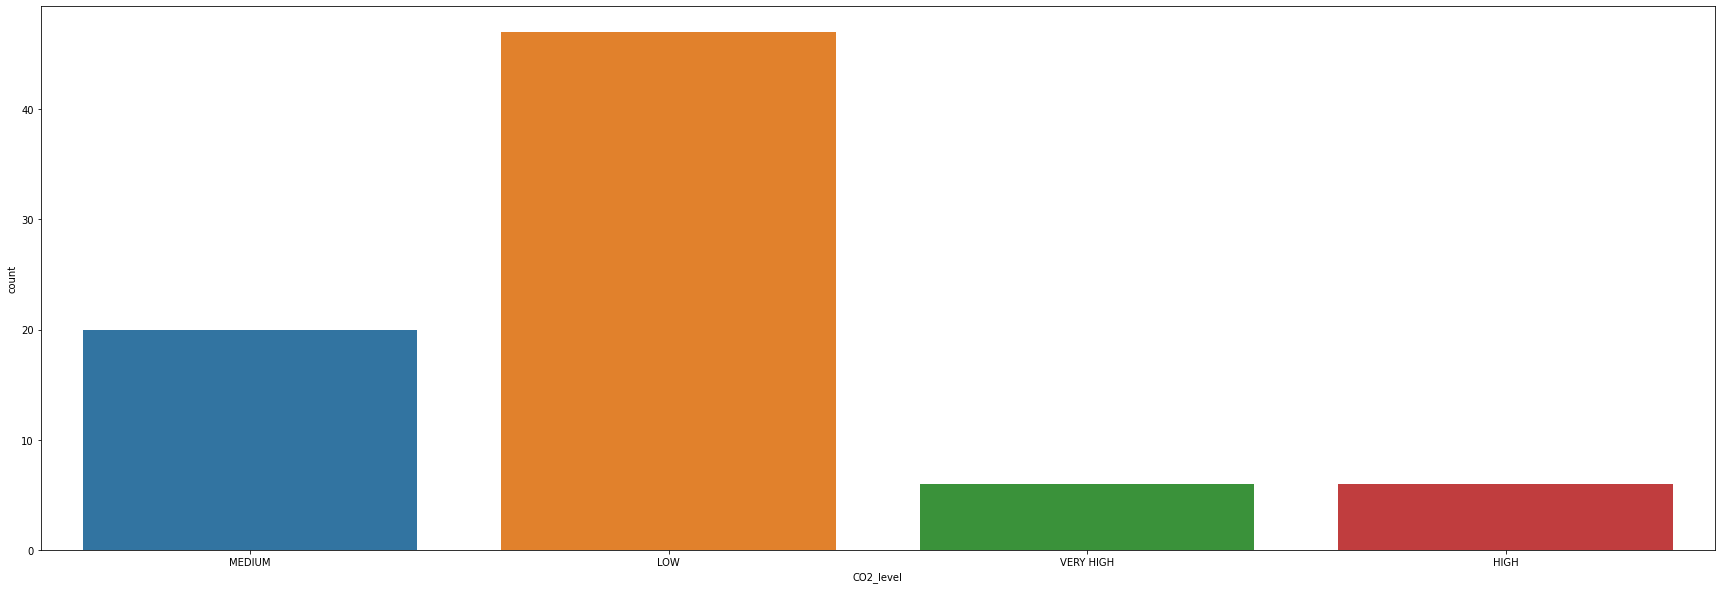

In [4]:
#checking the count of every category in CO2_level
plt.figure(figsize=(30, 10))
sns.countplot(Data['CO2_level'])
plt.show()

In [5]:
#encode CO2_level categories to numbers
Encoder = LabelEncoder()
Data['CO2_level'] = Encoder.fit_transform(Data['CO2_level'])
Data['item'] = Encoder.fit_transform(Data['item'])

In [6]:
XTrain = Data.drop('CO2_level', axis = 1)
YTrain = Data['CO2_level']

In [7]:
XTrain,XTest,YTrain,YTest=train_test_split(XTrain,YTrain,test_size=0.2,random_state=12, shuffle=True)

c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


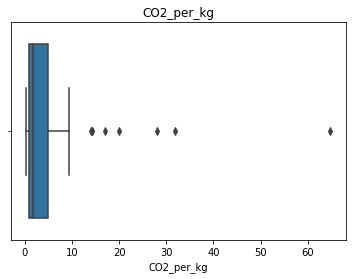

In [8]:
#checking outliers in CO2_per_kg
sns.boxplot(XTrain['CO2_per_kg']).set_title('CO2_per_kg')
plt.show()

In [9]:
#replacing outliers in CO2_per_kg by median
Q1 = XTrain['CO2_per_kg'].quantile(0.25)
Q3 = XTrain['CO2_per_kg'].quantile(0.75)
IQR = Q3 - Q1

lower_IQR = Q1 - (IQR)
upper_IQR = Q3 + (IQR)
XTrain['CO2_per_kg']=np.where(XTrain['CO2_per_kg']>upper_IQR,upper_IQR,np.where(XTrain['CO2_per_kg']<lower_IQR,lower_IQR,XTrain['CO2_per_kg']))

c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


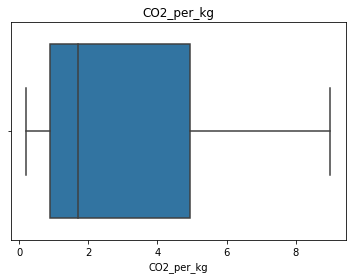

In [10]:
#Drawing boxplot after removing outliers
sns.boxplot(XTrain['CO2_per_kg']).set_title('CO2_per_kg')
plt.show()

## SVM model for classification

In [11]:
Model = SVC(kernel='rbf')
Model.fit(XTrain, YTrain)
YNew = Model.predict(XTest)
print('Accuracy without Normalization: ' )
print(accuracy_score(YTest, YNew))

Accuracy without Normalization: 
0.5625


In [12]:
Norm = MinMaxScaler().fit(XTrain)
XTrain = Norm.transform(XTrain)
XTest = Norm.transform(XTest)

In [13]:
Model = SVC(kernel='rbf')
Model.fit(XTrain, YTrain)
YNew = Model.predict(XTest)
print('Accuracy with Normalization: ' )
print(accuracy_score(YTest, YNew))

Accuracy with Normalization: 
0.75
